<a href="https://colab.research.google.com/github/farrelrassya/ClassificationEmployeeDataset/blob/main/Classification_EmployeeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
df=pd.read_csv('Employee.csv')
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [80]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [81]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [82]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

1. Most of the Employee have "Bachelors" degree
2. Very less Employee have "PHD" degree

In [83]:
edu=df['Education'].value_counts().reset_index()
edu

,index,Education
0,Bachelors,3601
1,Masters,873
2,PHD,179


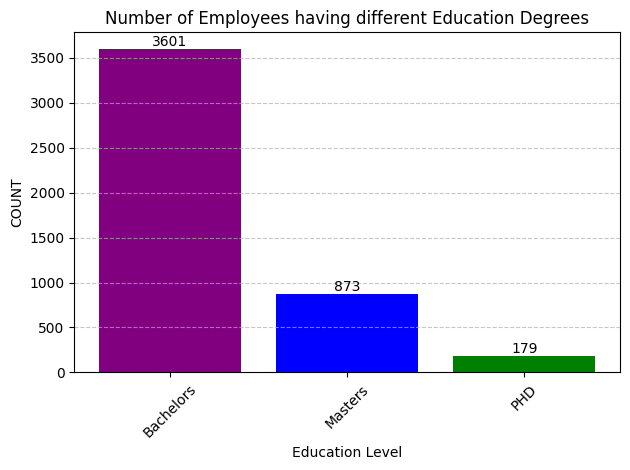

In [84]:
import matplotlib.pyplot as plt

# Assuming 'edu' contains the DataFrame with 'index' and 'Education' columns.
colors = ['purple', 'blue', 'green']

# Create a bar plot
plt.bar(edu['index'], edu['Education'], color=colors)
plt.title('Number of Employees having different Education Degrees')
plt.xlabel('Education Level')
plt.ylabel('COUNT')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add counts on top of the bars
for i, count in enumerate(edu['Education']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()



In [85]:
city1=df['City'].value_counts().reset_index()
city1

,index,City
0,Bangalore,2228
1,Pune,1268
2,New Delhi,1157


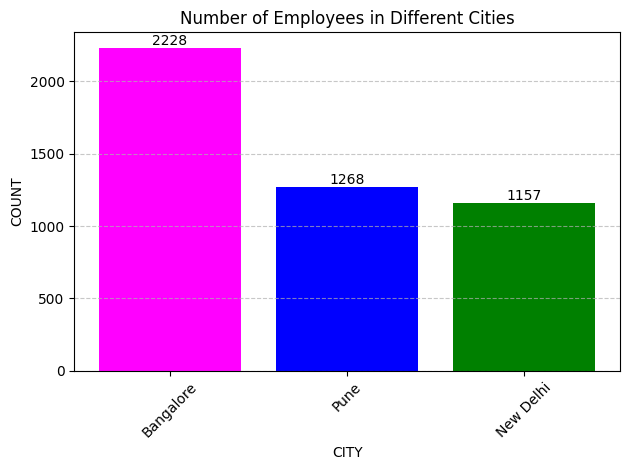

In [86]:
import matplotlib.pyplot as plt

# Assuming 'city' contains the DataFrame with 'City' and 'count' columns.
colors = ['magenta', 'blue', 'green']  # Three different colors for the bars

# Create a bar plot
plt.bar(city1['index'], city1['City'], color=colors)
plt.title('Number of Employees in Different Cities')
plt.xlabel('CITY')
plt.ylabel('COUNT')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add counts on top of the bars
for i, count in enumerate(city1['City']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [87]:
tier=df['PaymentTier'].value_counts().reset_index()
tier

,index,PaymentTier
0,3,3492
1,2,918
2,1,243


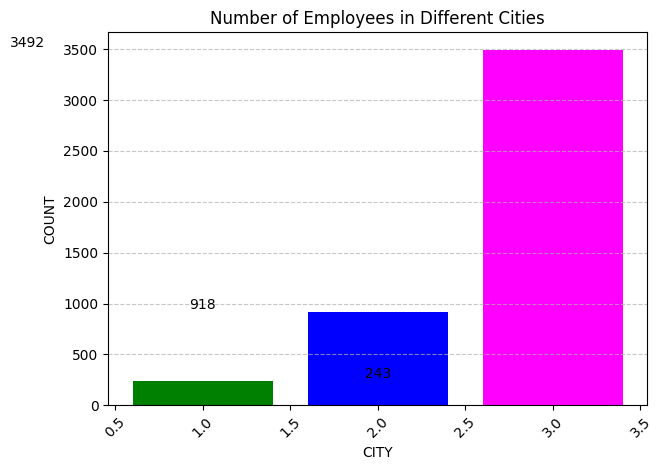

In [88]:
# Assuming 'city' contains the DataFrame with 'City' and 'count' columns.
colors = ['magenta', 'blue', 'green']  # Three different colors for the bars

# Create a bar plot
plt.bar(tier['index'], tier['PaymentTier'], color=colors)
plt.title('Number of Employees in Different Cities')
plt.xlabel('CITY')
plt.ylabel('COUNT')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add counts on top of the bars
for i, count in enumerate(tier['PaymentTier']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [89]:
df['Age'].unique()
age=df['Age'].value_counts().reset_index()


In [90]:
age=age.sort_values(by='index')
age

,index,Age
18,22,49
19,23,48
4,24,385
3,25,418
0,26,645
2,27,625
1,28,630
5,29,230
6,30,220
14,31,125


In [91]:
fig=px.line(age,x='index',y='Age')
fig.update_layout(title_text='Number of Employees in Different Age', xaxis_title='Age', yaxis_title='COUNT')
fig.show()


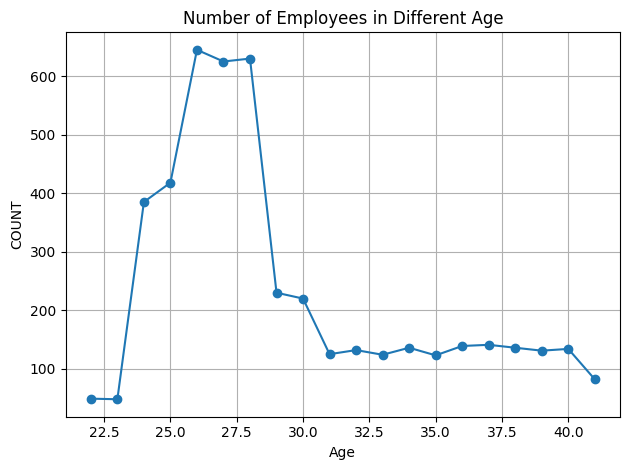

In [257]:
import matplotlib.pyplot as plt


plt.plot(age['index'], age['Age'], marker='o', linestyle='-')
plt.title('Number of Employees in Different Age')
plt.xlabel('Age')
plt.ylabel('COUNT')
plt.grid(True)
plt.tight_layout()

plt.show()


In [93]:
fig=px.histogram(df, x="Education", color="LeaveOrNot",color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(bargap=0.1)
fig.show()


In [94]:
fig=px.histogram(df, x="JoiningYear", color="LeaveOrNot",color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

In [95]:
fig=px.histogram(df, x="City", color="LeaveOrNot",color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

In [96]:
fig=px.histogram(df, x="PaymentTier", color="LeaveOrNot",color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

In [97]:
# Gender =>
fig=px.histogram(df, x="Gender", color="LeaveOrNot",color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(bargap=0.2)
fig.show()

In [258]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

df['Education']

0       0
1       0
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: Education, Length: 4653, dtype: int64

In [259]:
df['Gender'] = le.fit_transform(df['Gender'])

df['City'] = le.fit_transform(df['City'])

df['EverBenched'] = le.fit_transform(df['EverBenched'])

In [110]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [111]:
target = [ 'LeaveOrNot']
X =  df.drop(columns=target)
y = df[target]

In [112]:
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [113]:
y.head()

,LeaveOrNot
0,0
1,1
2,0
3,1
4,1


In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [260]:
# Train logistic regression models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


vanilla_model = LogisticRegression(penalty='none', solver='newton-cg')
vanilla_model.fit(x_train, y_train)


l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
l1_model.fit(x_train, y_train)


l2_model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
l2_model.fit(x_train, y_train)


vanilla_accuracy = accuracy_score(y_test, vanilla_model.predict(x_test))
l1_accuracy = accuracy_score(y_test, l1_model.predict(x_test))
l2_accuracy = accuracy_score(y_test, l2_model.predict(x_test))

print("Vanilla Logistic Regression Accuracy:", vanilla_accuracy)
print("L1 (Lasso) Logistic Regression Accuracy:", l1_accuracy)
print("L2 (Ridge) Logistic Regression Accuracy:", l2_accuracy)


Vanilla Logistic Regression Accuracy: 0.7177650429799427
L1 (Lasso) Logistic Regression Accuracy: 0.7213467048710601
L2 (Ridge) Logistic Regression Accuracy: 0.7148997134670487


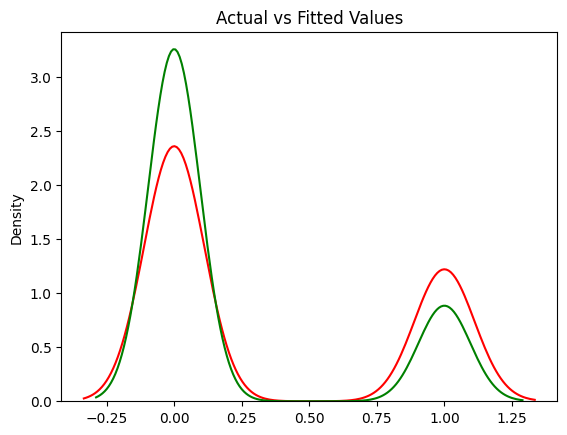

In [264]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred_vanilla, hist=False, color="g", label="Fitted" , ax=ax1)


plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [265]:
from sklearn.naive_bayes import BernoulliNB
modelnb = BernoulliNB()
modelnb.fit(x_train, y_train)


y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8638968481375359
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       920
           1       0.86      0.72      0.78       476

    accuracy                           0.86      1396
   macro avg       0.86      0.83      0.84      1396
weighted avg       0.86      0.86      0.86      1396



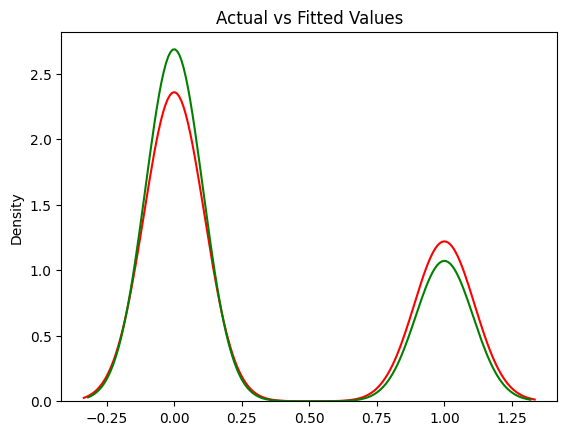

In [238]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred, hist=False, color="g", label="Fitted" , ax=ax1)


plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(500)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

print(accuracy_score(y_test,y_pred_rf))

0.8531518624641834


In [226]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       920
           1       0.83      0.71      0.77       476

    accuracy                           0.85      1396
   macro avg       0.85      0.82      0.83      1396
weighted avg       0.85      0.85      0.85      1396



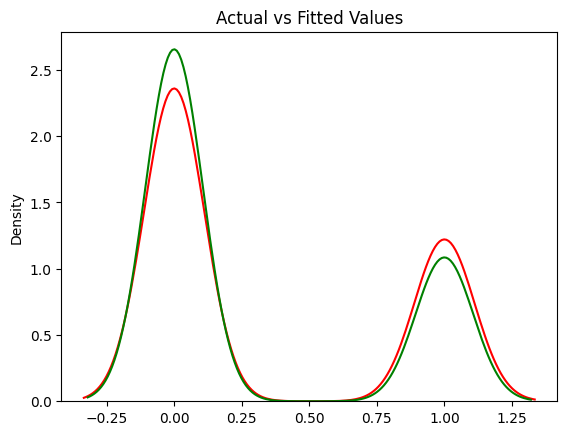

In [227]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred_rf, hist=False, color="g", label="Fitted" , ax=ax1)


plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [228]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred_gb=gbc.predict(x_test)

print(accuracy_score(y_test,y_pred_gb))

0.8581661891117478


In [229]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       920
           1       0.89      0.67      0.76       476

    accuracy                           0.86      1396
   macro avg       0.87      0.81      0.83      1396
weighted avg       0.86      0.86      0.85      1396



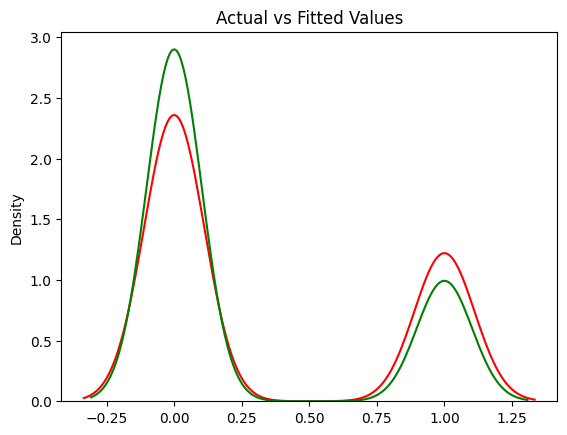

In [230]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred_gb, hist=False, color="g", label="Fitted" , ax=ax1)


plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [266]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8638968481375359


In [242]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       920
           1       0.86      0.72      0.78       476

    accuracy                           0.86      1396
   macro avg       0.86      0.83      0.84      1396
weighted avg       0.86      0.86      0.86      1396



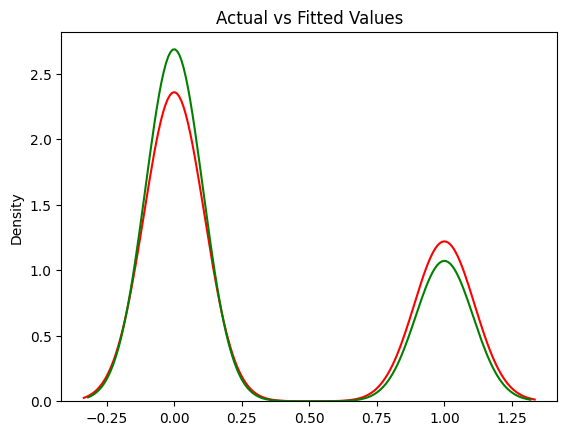

In [243]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")
sns.distplot(y_pred, hist=False, color="g", label="Fitted" , ax=ax1)


plt.title('Actual vs Fitted Values')

plt.show()
plt.close()

In [267]:
from sklearn.metrics import roc_auc_score


y_pred_logistic = vanilla_model.predict_proba(x_test)[:, 1]
y_pred_naive_bayes = modelnb.predict_proba(x_test)[:, 1]
y_pred_rf = rf.predict_proba(x_test)[:, 1]
y_pred_xgb = xgb_model.predict_proba(x_test)[:, 1]
y_pred_gbc = gbc.predict_proba(x_test)[:, 1]

roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_naive_bayes)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)

print("Logistic Regression ROC-AUC:", roc_auc_logistic)
print("Naive Bayes ROC-AUC:", roc_auc_naive_bayes)
print("Random Forest ROC-AUC:", roc_auc_rf)
print("XGBoost ROC-AUC:", roc_auc_xgb)
print("Gradient Boosting ROC-AUC:", roc_auc_gbc)


Logistic Regression ROC-AUC: 0.730760184508586
Naive Bayes ROC-AUC: 0.6789162404092073
Random Forest ROC-AUC: 0.8692980453050785
XGBoost ROC-AUC: 0.8882638381439532
Gradient Boosting ROC-AUC: 0.8818471410303252


In [269]:
from sklearn.metrics import roc_auc_score


y_pred_logistic = vanilla_model.predict_proba(x_test)[:, 1]
y_pred_naive_bayes = modelnb.predict_proba(x_test)[:, 1]
y_pred_rf = rf.predict_proba(x_test)[:, 1]
y_pred_xgb = xgb_model.predict_proba(x_test)[:, 1]
y_pred_gbc = gbc.predict_proba(x_test)[:, 1]


roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)
roc_auc_naive_bayes = roc_auc_score(y_test, y_pred_naive_bayes)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)


print("Logistic Regression ROC-AUC:", roc_auc_logistic)
print("Naive Bayes ROC-AUC:", roc_auc_naive_bayes)
print("Random Forest ROC-AUC:", roc_auc_rf)
print("XGBoost ROC-AUC:", roc_auc_xgb)
print("Gradient Boosting ROC-AUC:", roc_auc_gbc)


Logistic Regression ROC-AUC: 0.730760184508586
Naive Bayes ROC-AUC: 0.6789162404092073
Random Forest ROC-AUC: 0.8692980453050785
XGBoost ROC-AUC: 0.8882638381439532
Gradient Boosting ROC-AUC: 0.8818471410303252


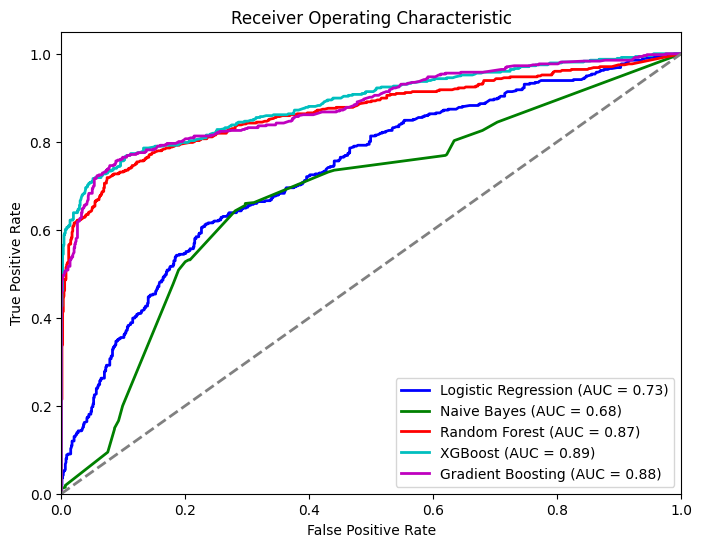

In [270]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
fpr_naive_bayes, tpr_naive_bayes, _ = roc_curve(y_test, y_pred_naive_bayes)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc)


roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_naive_bayes = auc(fpr_naive_bayes, tpr_naive_bayes)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='g', lw=2, label=f'Naive Bayes (AUC = {roc_auc_naive_bayes:.2f})')
plt.plot(fpr_rf, tpr_rf, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='c', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='m', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
